# Modelos de Regressão com Deep Learning 

## Regressão de uma saída - Dadaset Preço de Carros 

### Import de libs e dataset

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
base = pd.read_csv('dados/autos.csv', encoding = 'ISO-8859-1')
base

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [3]:
base = base.drop(['dateCrawled', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'], axis = 1)
base

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [4]:
base['name'].value_counts()

Ford_Fiesta                                              657
BMW_318i                                                 627
Opel_Corsa                                               622
Volkswagen_Golf_1.4                                      603
BMW_316i                                                 523
                                                        ... 
Audi_A4_Avant_Klima_Gruene_Plakette_TÜV_&AU_NEU_XENON      1
Renault_clio_in_gold_450VB_!!                              1
Fiat_Doblo_1.6_Multijet                                    1
Renault_Laguna_1                                           1
BMW_M135i_vollausgestattet_NP_52.720____Euro               1
Name: name, Length: 233531, dtype: int64

In [5]:
base = base.drop('name', axis = 1)

In [6]:
base['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [7]:
base = base.drop('seller', axis = 1)

In [8]:
base['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [9]:
base = base.drop('offerType', axis = 1)

In [10]:
base['abtest'].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

In [11]:
base['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

**REMOVEMOS** COLUNAS COM DADOS DESBALANCEADOS

### Removendo dados inconsistentes

In [12]:
base['yearOfRegistration'].value_counts()

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
        ...  
2066        1
9450        1
3200        1
1925        1
3500        1
Name: yearOfRegistration, Length: 155, dtype: int64

In [13]:
base = base.loc[(base.price > 10) & (base.price < 35000)]
base

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


<AxesSubplot:>

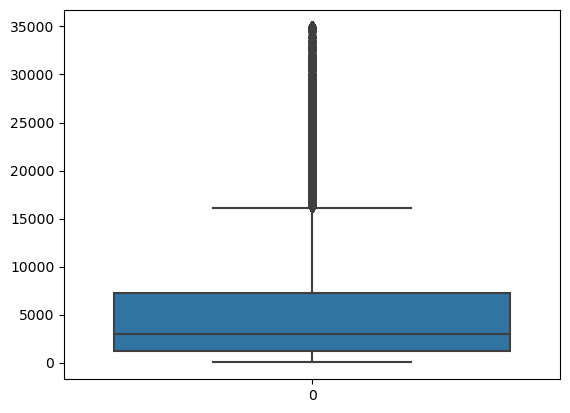

In [14]:
sns.boxplot(data = base.price)

In [15]:
base['vehicleType'].value_counts()

limousine     92943
kleinwagen    78008
kombi         65562
bus           29420
cabrio        21630
coupe         17347
suv           13841
andere         3112
Name: vehicleType, dtype: int64

In [16]:
base.loc[pd.isnull(base['vehicleType'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
22,2900,test,NaN,2018,manuell,90,meriva,150000,5,benzin,opel,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
31,899,control,NaN,2016,manuell,60,clio,150000,6,benzin,renault,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [17]:
base['gearbox'].value_counts()

manuell      265430
automatik     72814
Name: gearbox, dtype: int64

In [18]:
base.loc[pd.isnull(base['gearbox'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
15,450,test,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN
16,300,test,NaN,2016,NaN,60,polo,150000,0,benzin,volkswagen,NaN
32,245,test,limousine,1994,NaN,0,golf,150000,2,benzin,volkswagen,nein
37,1500,test,NaN,2016,NaN,0,kangoo,150000,1,diesel,renault,nein
70,1200,test,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371443,3300,control,kombi,2006,NaN,0,touran,150000,7,diesel,volkswagen,NaN
371460,3500,control,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN
371486,350,control,kleinwagen,1996,NaN,65,punto,150000,0,NaN,fiat,NaN
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN


In [19]:
base['model'].value_counts()

golf          28963
andere        24812
3er           19859
polo          12604
corsa         12148
              ...  
kalina            9
serie_2           8
rangerover        6
serie_3           3
serie_1           1
Name: model, Length: 250, dtype: int64

In [20]:
base.loc[pd.isnull(base['model'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
83,350,control,kleinwagen,1997,manuell,54,NaN,150000,3,NaN,fiat,ja
139,1450,control,limousine,1992,manuell,136,NaN,150000,0,NaN,audi,nein
156,6799,control,kleinwagen,2009,NaN,60,NaN,20000,5,benzin,volkswagen,nein
165,500,control,kleinwagen,1999,manuell,0,NaN,150000,0,benzin,renault,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371399,560,control,kleinwagen,2001,automatik,170,NaN,90000,0,benzin,fiat,ja
371476,9400,control,kombi,2007,manuell,200,NaN,150000,4,diesel,sonstige_autos,ja
371495,180,control,NaN,1995,NaN,0,NaN,125000,3,benzin,opel,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein


In [21]:
base['fuelType'].value_counts()

benzin     215366
diesel     104462
lpg          5216
cng           557
hybrid        258
andere        162
elektro        91
Name: fuelType, dtype: int64

In [22]:
base.loc[pd.isnull(base['fuelType'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
13,2500,control,kombi,2004,manuell,131,passat,150000,2,NaN,volkswagen,nein
26,5555,control,NaN,2017,manuell,125,c4,125000,4,NaN,citroen,nein
36,1600,control,andere,1991,manuell,75,kadett,70000,0,NaN,opel,NaN
41,7500,control,limousine,2002,automatik,306,e_klasse,150000,4,NaN,mercedes_benz,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371496,3850,test,cabrio,2006,manuell,108,2_reihe,125000,2,NaN,peugeot,nein
371504,2600,control,NaN,2005,automatik,0,c_klasse,150000,9,NaN,mercedes_benz,NaN
371509,1900,test,NaN,2000,manuell,110,NaN,150000,7,NaN,volkswagen,nein
371519,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein


In [23]:
base['notRepairedDamage'].value_counts()

nein    255585
ja       33945
Name: notRepairedDamage, dtype: int64

In [24]:
base.loc[pd.isnull(base['notRepairedDamage'])]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
8,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN
9,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN
12,999,control,kombi,1995,manuell,115,passat,150000,11,benzin,volkswagen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
371507,5999,test,kombi,2005,manuell,140,a4,150000,4,diesel,audi,NaN
371514,999,control,cabrio,2000,manuell,95,megane,150000,4,benzin,renault,NaN
371515,1690,test,kombi,2004,manuell,55,fabia,150000,4,benzin,skoda,NaN
371523,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN


In [25]:
valores = {
    'vehicleType' : 'limousine', 
    'gearbox' : 'manuell', 
    'model' : 'golf', 
    'fuelType' : 'benzin',
    'notRepairedDamage' : 'nein'
}

base = base.fillna(value = valores)
base

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein
1,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein


In [26]:
base.isnull().value_counts()

price  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  model  kilometer  monthOfRegistration  fuelType  brand  notRepairedDamage
False  False   False        False               False    False    False  False      False                False     False  False                355333
dtype: int64

### Label Encoder

In [27]:
previsores = base.iloc[:, 1:13].values
preco_real = base.iloc[:, 0].values

In [28]:
previsores.shape

(355333, 11)

In [29]:
labelencoder_previsores = LabelEncoder()
previsores[:, 0] = labelencoder_previsores.fit_transform(previsores[:, 0])

In [30]:
previsores[0]

array([1, 'limousine', 1993, 'manuell', 0, 'golf', 150000, 0, 'benzin',
       'volkswagen', 'nein'], dtype=object)

In [31]:
previsores[:, 0] = labelencoder_previsores.fit_transform(previsores[:, 0])
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
previsores[:, 10] = labelencoder_previsores.fit_transform(previsores[:, 10])

In [32]:
previsores[0]

array([1, 6, 1993, 1, 0, 117, 150000, 0, 1, 38, 1], dtype=object)

### One Hot encoder

In [33]:
previsores[0:20]

array([[1, 6, 1993, 1, 0, 117, 150000, 0, 1, 38, 1],
       [1, 3, 2011, 1, 190, 117, 125000, 5, 3, 1, 0],
       [1, 7, 2004, 0, 163, 118, 125000, 8, 3, 14, 1],
       [1, 4, 2001, 1, 75, 117, 150000, 6, 1, 38, 1],
       [1, 4, 2008, 1, 69, 102, 90000, 7, 3, 31, 1],
       [1, 6, 1995, 1, 102, 11, 150000, 10, 1, 2, 0],
       [1, 2, 2004, 1, 109, 8, 150000, 8, 1, 25, 1],
       [0, 1, 2014, 1, 125, 61, 30000, 8, 1, 10, 1],
       [1, 4, 1998, 1, 101, 117, 150000, 0, 1, 38, 1],
       [0, 6, 2004, 1, 105, 10, 150000, 12, 1, 19, 1],
       [0, 5, 2005, 1, 140, 170, 150000, 12, 3, 38, 0],
       [0, 5, 1995, 1, 115, 170, 150000, 11, 1, 38, 1],
       [0, 5, 2004, 1, 131, 170, 150000, 2, 1, 38, 1],
       [0, 7, 2011, 1, 190, 160, 70000, 3, 3, 23, 1],
       [1, 4, 1910, 1, 0, 129, 5000, 0, 1, 10, 1],
       [1, 6, 2016, 1, 60, 173, 150000, 0, 1, 38, 1],
       [0, 4, 2004, 0, 75, 227, 150000, 2, 1, 27, 1],
       [1, 1, 2007, 1, 136, 61, 150000, 6, 3, 10, 1],
       [1, 1, 2004, 1, 102,

In [34]:
onehotencoder = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [0,1,3,5,8,9,10]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columnsOneHotEncoder(categorical_features = [0,1,3,5,8,9,10])
)

previsores = onehotencoder.fit_transform(previsores).toarray()

previsores.shape

(355333, 315)

### Estrutura da Rede Neural

In [36]:
(315 + 1)/ 2

158.0

In [37]:
regressor = Sequential()

regressor.add(Dense(
    units = 158,
    activation = 'relu',
    input_dim = 315
))
regressor.add(Dense(
    units = 158,
    activation = 'relu',
))
regressor.add(Dense(
    units = 1,
    activation = 'linear'         # Utilizamos a função linear para passar o valor bruto como saída
))

regressor.compile(
    loss = 'mean_absolute_error',
    optimizer = 'adam',
    metrics = ['mean_absolute_error']
)
regressor.fit(
    previsores,
    preco_real,
    batch_size = 300,
    epochs = 100
)

Epoch 1/100
1185/1185 [==============================] - 6s 3ms/step - loss: 3390.8286 - mean_absolute_error: 3390.8286
Epoch 2/100
1185/1185 [==============================] - 3s 3ms/step - loss: 2933.1621 - mean_absolute_error: 2933.1621
Epoch 3/100
1185/1185 [==============================] - 4s 3ms/step - loss: 2669.8574 - mean_absolute_error: 2669.8574
Epoch 4/100
1185/1185 [==============================] - 3s 3ms/step - loss: 2536.3906 - mean_absolute_error: 2536.3906
Epoch 5/100
1185/1185 [==============================] - 3s 3ms/step - loss: 2476.0151 - mean_absolute_error: 2476.0151
Epoch 6/100
1185/1185 [==============================] - 4s 3ms/step - loss: 2431.1968 - mean_absolute_error: 2431.1968
Epoch 7/100
1185/1185 [==============================] - 3s 3ms/step - loss: 2383.3457 - mean_absolute_error: 2383.3457
Epoch 8/100
1185/1185 [==============================] - 4s 3ms/step - loss: 2360.4258 - mean_absolute_error: 2360.4258
Epoch 9/100
1185/1185 [=================

In [38]:
previsoes = regressor.predict(previsores)

In [39]:
preco_real.mean(), previsoes.mean()

(5349.607784810305, 5466.0493)

In [40]:
preco_real.std(), previsoes.std()

(5998.760638586369, 5207.7603)

In [51]:
previsoes = previsoes.reshape(len(previsoes),)

In [52]:
preco_real.shape

(355333,)

In [64]:
preco_real = np.round(preco_real, decimals)
previsoes = np.round(previsoes)

In [66]:
df_comparacao = np.stack([preco_real, previsoes], axis = 1)
df_comparacao = pd.DataFrame(df_comparacao).rename(columns = {0: 'preco_real', 1: 'previsao'})
df_comparacao

,preco_real,previsao
0,480.0,1599.0
1,18300.0,11100.0
2,9800.0,13163.0
3,1500.0,1923.0
4,3600.0,7080.0
...,...,...
355328,2200.0,1922.0
355329,1199.0,5035.0
355330,9200.0,6867.0
355331,3400.0,3975.0


### Validação Cruzada

In [74]:
def criar_rede():
    regressor = Sequential()

    regressor.add(Dense(
        units = 158,
        activation = 'relu',
        input_dim = 315
    ))
    regressor.add(Dense(
        units = 158,
        activation = 'relu',
    ))
    regressor.add(Dense(
        units = 1,
        activation = 'linear'         # Utilizamos a função linear para passar o valor bruto como saída
    ))

    regressor.compile(
        loss = 'mean_absolute_error',
        optimizer = 'adam',
        metrics = ['mean_absolute_error']
    )

    return regressor

In [75]:
regressor = KerasRegressor(
    build_fn = criar_rede,
    epochs = 50,
    batch_size = 300
)

resultados = cross_val_score(
    estimator= regressor,
    X = previsores,
    y = preco_real,
    cv = 10,
    scoring = 'neg_mean_absolute_error'
)

In [71]:
media = resultados.mean()
desvio = resultados.std()

In [72]:
media, desvio

(nan, nan)

## Regressão de Multiplas saídas - base vídeo games

### Importação de Libs e dadataset

In [1]:
import pandas as pd
import tensorflow as tf

from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
base = pd.read_csv('dados/games.csv')
base

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
base = base.drop(columns = ['Other_Sales', 'Global_Sales', 'Developer'])
base

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN


### Pré processamento

In [4]:
# Tratando dados faltantes

base = base.dropna(axis = 0)    # Apaga todas as linhas que contem NAN
base

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,46.0,4.0,2.4,21.0,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,81.0,12.0,8.8,9.0,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,80.0,20.0,7.6,412.0,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,61.0,12.0,5.8,43.0,T


In [5]:
base = base.loc[base['NA_Sales'] > 1]
base = base.loc[base['EU_Sales'] > 1]

base

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Medal of Honor,PS,1998.0,Shooter,Electronic Arts,1.44,1.09,0.00,92.0,17.0,8.6,80.0,T
573,Tom Clancy's Splinter Cell,PS2,2003.0,Action,Ubisoft,1.15,1.11,0.00,89.0,24.0,7.7,102.0,T
591,Mario Strikers Charged,Wii,2007.0,Sports,Nintendo,1.05,1.05,0.24,79.0,47.0,8,124.0,E10+
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,80.0,15.0,7.9,46.0,T


In [6]:
base['Name'].value_counts()

Grand Theft Auto V                 4
Assassin's Creed IV: Black Flag    3
Call of Duty: Ghosts               3
Battlefield 4                      3
The Elder Scrolls V: Skyrim        3
                                  ..
Tekken 2                           1
Destiny                            1
Cooking Mama                       1
Forza Motorsport 3                 1
The Sims: Bustin' Out              1
Name: Name, Length: 223, dtype: int64

In [7]:
nome_jogos = base.Name
base = base.drop(columns= ['Name'])
base

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
568,PS,1998.0,Shooter,Electronic Arts,1.44,1.09,0.00,92.0,17.0,8.6,80.0,T
573,PS2,2003.0,Action,Ubisoft,1.15,1.11,0.00,89.0,24.0,7.7,102.0,T
591,Wii,2007.0,Sports,Nintendo,1.05,1.05,0.24,79.0,47.0,8,124.0,E10+
610,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,80.0,15.0,7.9,46.0,T


In [8]:
previsores = base.iloc[: , [0,1,2,3,7,8,9,10,11]].values
venda_na = base.iloc[: , 4].values
venda_eu = base.iloc[: , 5].values
venda_jp = base.iloc[: , 6].values

In [9]:
previsores[0]

array(['Wii', 2006.0, 'Sports', 'Nintendo', 76.0, 51.0, '8', 322.0, 'E'],
      dtype=object)

In [10]:
onehotencoder = ColumnTransformer(
    transformers=[
        ("OneHot",                      # Just a name
         OneHotEncoder(),               # The transformer class
         [0,2,3,8]                      # The column(s) to be applied on.
         )
    ],
    remainder='passthrough'             # donot apply anything to the remaining columnsOneHotEncoder
)

previsores = onehotencoder.fit_transform(previsores).toarray()

previsores.shape

(258, 61)

### Estrutura da Rede Neural

In [11]:
qtd_neuronios = (61 + 3) / 2
qtd_neuronios

32.0

In [12]:
camada_entrada = Input(shape = (previsores.shape[1], ))

camada_oculta1 = Dense(
    units= 32,
    activation = 'sigmoid'
)(camada_entrada)
camada_oculta2 = Dense(
    units = 32,
    activation= 'sigmoid'
)(camada_oculta1)

camada_saida1 = Dense(
    units = 1,
    activation = 'linear'
)(camada_oculta2)
camada_saida2 = Dense(
    units = 1,
    activation = 'linear'
)(camada_oculta2)
camada_saida3 = Dense(
    units = 1,
    activation = 'linear'
)(camada_oculta2)

In [14]:
regressor = Model(inputs = camada_entrada, outputs = [camada_saida1, camada_saida2, camada_saida3])

regressor.compile(
    optimizer = 'adam',
    loss = 'mse'
)

regressor.fit(previsores, [venda_na, venda_eu, venda_jp],
    epochs = 3500,
    batch_size = 100
)

Epoch 1/3500
3/3 [==============================] - 1s 10ms/step - loss: 18.7613 - dense_2_loss: 11.8215 - dense_3_loss: 5.7965 - dense_4_loss: 1.1433
Epoch 2/3500
3/3 [==============================] - 0s 9ms/step - loss: 18.7431 - dense_2_loss: 11.8096 - dense_3_loss: 5.7887 - dense_4_loss: 1.1448
Epoch 3/3500
3/3 [==============================] - 0s 16ms/step - loss: 18.7202 - dense_2_loss: 11.7959 - dense_3_loss: 5.7825 - dense_4_loss: 1.1419
Epoch 4/3500
3/3 [==============================] - 0s 13ms/step - loss: 18.7122 - dense_2_loss: 11.7919 - dense_3_loss: 5.7782 - dense_4_loss: 1.1421
Epoch 5/3500
3/3 [==============================] - 0s 6ms/step - loss: 18.7054 - dense_2_loss: 11.7876 - dense_3_loss: 5.7760 - dense_4_loss: 1.1418
Epoch 6/3500
3/3 [==============================] - 0s 8ms/step - loss: 18.7007 - dense_2_loss: 11.7818 - dense_3_loss: 5.7770 - dense_4_loss: 1.1419
Epoch 7/3500
3/3 [==============================] - 0s 9ms/step - loss: 18.6956 - dense_2_loss: 1

In [15]:
regressor.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 61)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           1984        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           1056        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1)            33          dense_1[0][0]                    
____________________________________________________________________________________________

In [17]:
previsao_na, previsao_eu, previsao_jp = regressor.predict(previsores)

In [22]:
venda_na, previsao_na

(array([41.36, 15.68, 15.61, 11.28, 13.96, 14.44,  9.71,  8.92, 15.  ,
         9.01,  7.02,  4.74,  9.66,  8.41,  3.43,  6.85,  9.04,  9.7 ,
         4.99,  8.25,  8.52,  5.54,  6.99,  6.62,  5.03,  5.99,  3.96,
         2.5 ,  7.97,  6.06,  6.76,  4.02,  4.89,  2.96,  4.99,  4.76,
         6.73,  5.95,  3.66,  7.04,  3.01,  6.65,  3.88,  5.8 ,  4.1 ,
         5.93,  2.03,  4.4 ,  5.05,  1.12,  6.82,  1.75,  3.74,  1.06,
         2.91,  2.28,  2.76,  2.9 ,  2.81,  3.56,  4.81,  4.46,  3.27,
         3.48,  2.85,  2.53,  3.27,  3.74,  3.68,  3.15,  4.41,  2.71,
         2.93,  4.05,  4.15,  2.77,  3.11,  3.27,  1.66,  2.79,  2.64,
         3.17,  4.98,  2.55,  2.57,  3.64,  4.34,  3.7 ,  4.01,  3.11,
         4.05,  3.92,  3.54,  2.45,  3.18,  2.63,  2.41,  2.8 ,  1.88,
         2.26,  2.49,  3.57,  3.07,  2.54,  3.28,  2.99,  3.14,  2.71,
         2.81,  2.62,  2.07,  2.73,  1.85,  1.74,  3.13,  1.92,  3.22,
         3.11,  2.3 ,  1.21,  1.09,  2.44,  1.98,  3.59,  1.96,  1.85,
      

In [27]:
na = np.stack([venda_na, previsao_na.reshape(len(previsao_na),)], axis = 1)
na = pd.DataFrame(na).rename(columns = {0: 'venda_na', 1 : 'previsao_na'})
na

,venda_na,previsao_na
0,41.36,31.778959
1,15.68,3.679254
2,15.61,11.341484
3,11.28,3.653958
4,13.96,10.770514
...,...,...
253,1.44,2.158080
254,1.15,2.158080
255,1.05,2.186075
256,1.13,2.158081


c:\Users\Pepe\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Pepe\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previsao_na', ylabel='Density'>

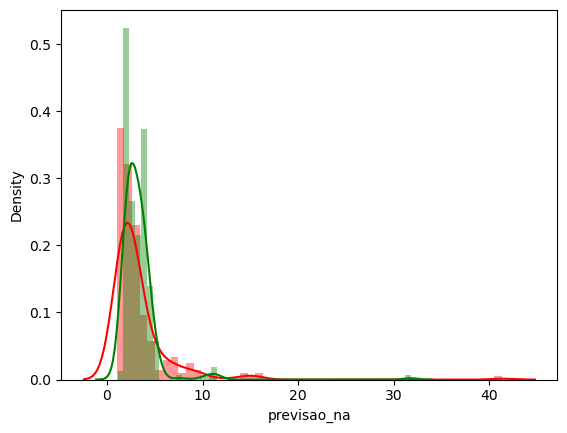

In [47]:
fig = sns.distplot(na['venda_na'], color = 'red')
fig = sns.distplot(na['previsao_na'], color = 'green')
fig

In [38]:
previsao_na.mean(), venda_na.mean()

(3.2864375, 3.283837209302326)